In [1]:
import torch
from torch.utils.data import DataLoader
from dataset import SingleFileTestDataset
import numpy as np
from model import Model
from datetime import date
from esm_pretrained import ESM
import time
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dir_path = os.path.abspath('')
print(dir_path)

/cluster/home/t116517uhn/llps-v2


In [4]:
training = pd.read_csv(dir_path + '/data/training_data_features.csv')
testing = pd.read_csv(dir_path + '/data/test_set_1_pos.csv')

In [16]:
training = training[['Category', 'Sequence_length']]
testing['length'] = testing['sequences'].str.len()

train_pos = training.loc[training['Category'] == 'LLPS+']
train_neg = training.loc[training['Category'].isin(['LLPS-', 'PDB*'])]

test_pos = testing.loc[testing['labels'] == 1]
test_neg = testing.loc[testing['labels'] == 0]

In [18]:
a = train_pos['Sequence_length']
b = train_neg['Sequence_length']
c = test_pos['length']
d = test_neg['length']

In [20]:
train_dict = {'POS': a, 'NEG': b}
test_dict = {'POS': c, 'NEG': d}

[Text(1, 0, 'POS'), Text(2, 0, 'NEG')]

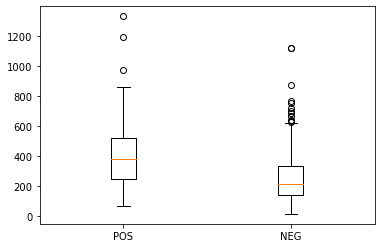

In [21]:
fig, ax = plt.subplots()
ax.boxplot(train_dict.values())
ax.set_xticklabels(train_dict.keys())

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(test_dict.values())
ax.set_xticklabels(test_dict.keys())

# Visualizing Training Curve with Validation Loss

In [4]:
data = pd.read_csv(dir_path+'/logs/2023-02-21_e200_bs4_log.csv')
data

,epoch,training_loss,mean_pos,mean_neg,val_loss
0,0,151.464800,0.492052,0.480582,35.251160
1,1,123.597859,0.562595,0.410745,25.437468
2,2,80.294969,0.693515,0.264731,16.076334
3,3,54.413256,0.794211,0.161878,9.225632
4,4,43.212161,0.855707,0.122855,7.255304
...,...,...,...,...,...
195,195,0.062583,0.999673,0.000245,5.259892
196,196,0.225761,0.998228,0.000291,0.361577
197,197,0.046820,0.999890,0.000309,0.348327
198,198,0.092843,0.999732,0.000561,0.435609


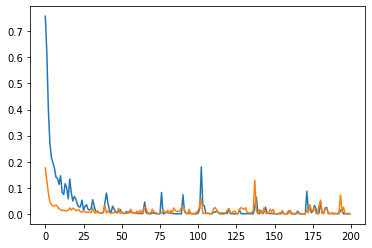

In [5]:
x = data['epoch']
y1 = data['training_loss']
y1 = y1/len(y1)
y2 = data['val_loss']
y2 = y2/len(y2)

plt.plot(x, y1, x, y2)
plt.show()

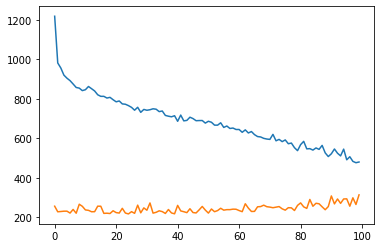

In [6]:
data = pd.read_csv(dir_path+'/logs/2023-02-16_e400_bs4_log.csv')
x = data['epoch']
y1 = data['training_loss']
y2 = data['val_loss']

plt.plot(x[:100], y1[:100], x[:100], y2[:100])
plt.show()